In [1]:
import numpy as np 
import pandas as pd 

In [2]:
Real = pd.read_csv('True.csv') #https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset
Fake = pd.read_csv('Fake.csv')

In [3]:
Real['label'] = 1
Fake['label'] = 0

In [4]:
Real.head(1)

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1


In [5]:
Fake.head(1)

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0


In [6]:
df = pd.concat([Real,Fake])

In [7]:
df = df.reset_index()

In [8]:
df['title'][0]

'As U.S. budget fight looms, Republicans flip their fiscal script'

In [9]:
len_of_text = []
for length in df['text']:
    len_of_text.append(len(length))

In [10]:
np.mean(len_of_text)

2469.1096930820972

In [11]:
stat =  pd.DataFrame(len_of_text)

In [12]:
import seaborn as sns 
import matplotlib.pyplot as plt 
import cufflinks as cf 
cf.go_offline()

In [13]:
plt.figure(figsize=(12,6))
#sns.scatterplot(x=stat[0],y=stat.index)
stat[0].iplot(kind='box')

<Figure size 864x432 with 0 Axes>

In [14]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [15]:
maxlen = 100

In [16]:
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(df['text'])
sequences = tokenizer.texts_to_sequences(df['text'])
data = pad_sequences(sequences=sequences , maxlen=maxlen)

In [17]:
len(tokenizer.word_index)

138021

In [18]:
data.shape

(44898, 100)

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(data, df['label'], test_size=0.2, random_state=101)

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Embedding,Flatten

In [22]:
model = Sequential()
model.add(Embedding(10000,100,input_length=maxlen))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 100)          1000000   
_________________________________________________________________
lstm (LSTM)                  (None, 32)                17024     
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 1,017,057
Trainable params: 1,017,057
Non-trainable params: 0
_________________________________________________________________


In [23]:
y_train = np.asarray(y_train)

In [24]:
model.fit(X_train,y_train,epochs=3,batch_size=32,validation_split=0.2)

Train on 28734 samples, validate on 7184 samples
Epoch 1/3
28734/28734 [==============================] - 93s 3ms/sample - loss: 0.1024 - acc: 0.9649 - val_loss: 0.0517 - val_acc: 0.9854
Epoch 2/3
28734/28734 [==============================] - 86s 3ms/sample - loss: 0.0235 - acc: 0.9924 - val_loss: 0.0351 - val_acc: 0.9896
Epoch 3/3
28734/28734 [==============================] - 85s 3ms/sample - loss: 0.0096 - acc: 0.9974 - val_loss: 0.0377 - val_acc: 0.9904


In [25]:
y_test = np.asarray(y_test)

In [26]:
model.evaluate(X_test,y_test,verbose=2)

8980/1 - 6s - loss: 0.0232 - acc: 0.9884


[0.04497853370926826, 0.9884187]

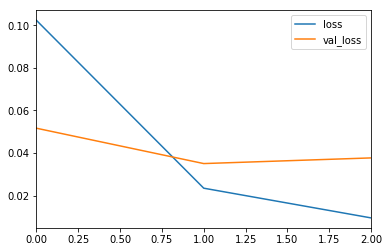

In [27]:
loss = pd.DataFrame(model.history.history)
loss[['loss','val_loss']].plot()

In [28]:
from sklearn.metrics import confusion_matrix,classification_report

In [29]:
pred = model.predict_classes(X_test)

In [30]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4671
           1       0.99      0.99      0.99      4309

   micro avg       0.99      0.99      0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



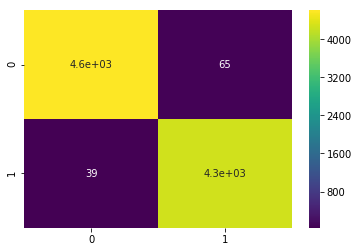

In [31]:
sns.heatmap(confusion_matrix(pred,y_test),annot=True,cmap='viridis')

In [32]:
confusion_matrix(pred,y_test)

array([[4606,   65],
       [  39, 4270]], dtype=int64)